In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

In [2]:
# 2. Load the generated CSV data
df = pd.read_csv('Fault Data.csv')

In [3]:
# 3. Quick look at the data
print(df.head())

             Timestamp  Voltage (V)  Current (A)  Power (kW)  Power Factor  \
0  2015-01-02 01:18:35   234.967142     7.453942    1.751432      0.943087   
1  2015-01-02 18:50:27   240.105153     0.695553    0.167006      0.920956   
2  2015-01-03 12:32:17   212.750822     6.312602    1.343011      0.921886   
3  2015-01-04 13:17:14   208.603793     2.396901    0.500003      1.000000   
4  2015-01-05 04:48:04   223.993613     7.000214    1.568003      0.935415   

   Temperature (°C)  Light Intensity (%)  Time of Day Day Type  \
0         24.440599            86.378044         1.30  Weekday   
1         27.374151            68.572397        18.83  Weekday   
2         27.859770            65.151863        12.53  Weekend   
3         31.971165            82.444383        13.28  Weekend   
4         24.892239            76.764892         4.80  Weekday   

   System Load (%) Weather Condition  Past Fault  
0        75.580826             Windy           0  
1        51.518343            St

In [4]:
# 4. Basic Data Exploration
print("\nDataset Information:\n")
print(df.info())

print("\nDescriptive Statistics:\n")
print(df.describe())

print("\nMissing Values:\n")
print(df.isnull().sum())


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            5000 non-null   object 
 1   Voltage (V)          5000 non-null   float64
 2   Current (A)          5000 non-null   float64
 3   Power (kW)           5000 non-null   float64
 4   Power Factor         5000 non-null   float64
 5   Temperature (°C)     5000 non-null   float64
 6   Light Intensity (%)  5000 non-null   float64
 7   Time of Day          5000 non-null   float64
 8   Day Type             5000 non-null   object 
 9   System Load (%)      5000 non-null   float64
 10  Weather Condition    5000 non-null   object 
 11  Past Fault           5000 non-null   int64  
dtypes: float64(8), int64(1), object(3)
memory usage: 468.9+ KB
None

Descriptive Statistics:

       Voltage (V)  Current (A)   Power (kW)  Power Factor  Temperature (°C

In [5]:
# 5. Encode categorical variables
le_day_type = LabelEncoder()
le_weather = LabelEncoder()

df['Day Type Encoded'] = le_day_type.fit_transform(df['Day Type'])
df['Weather Encoded'] = le_weather.fit_transform(df['Weather Condition'])

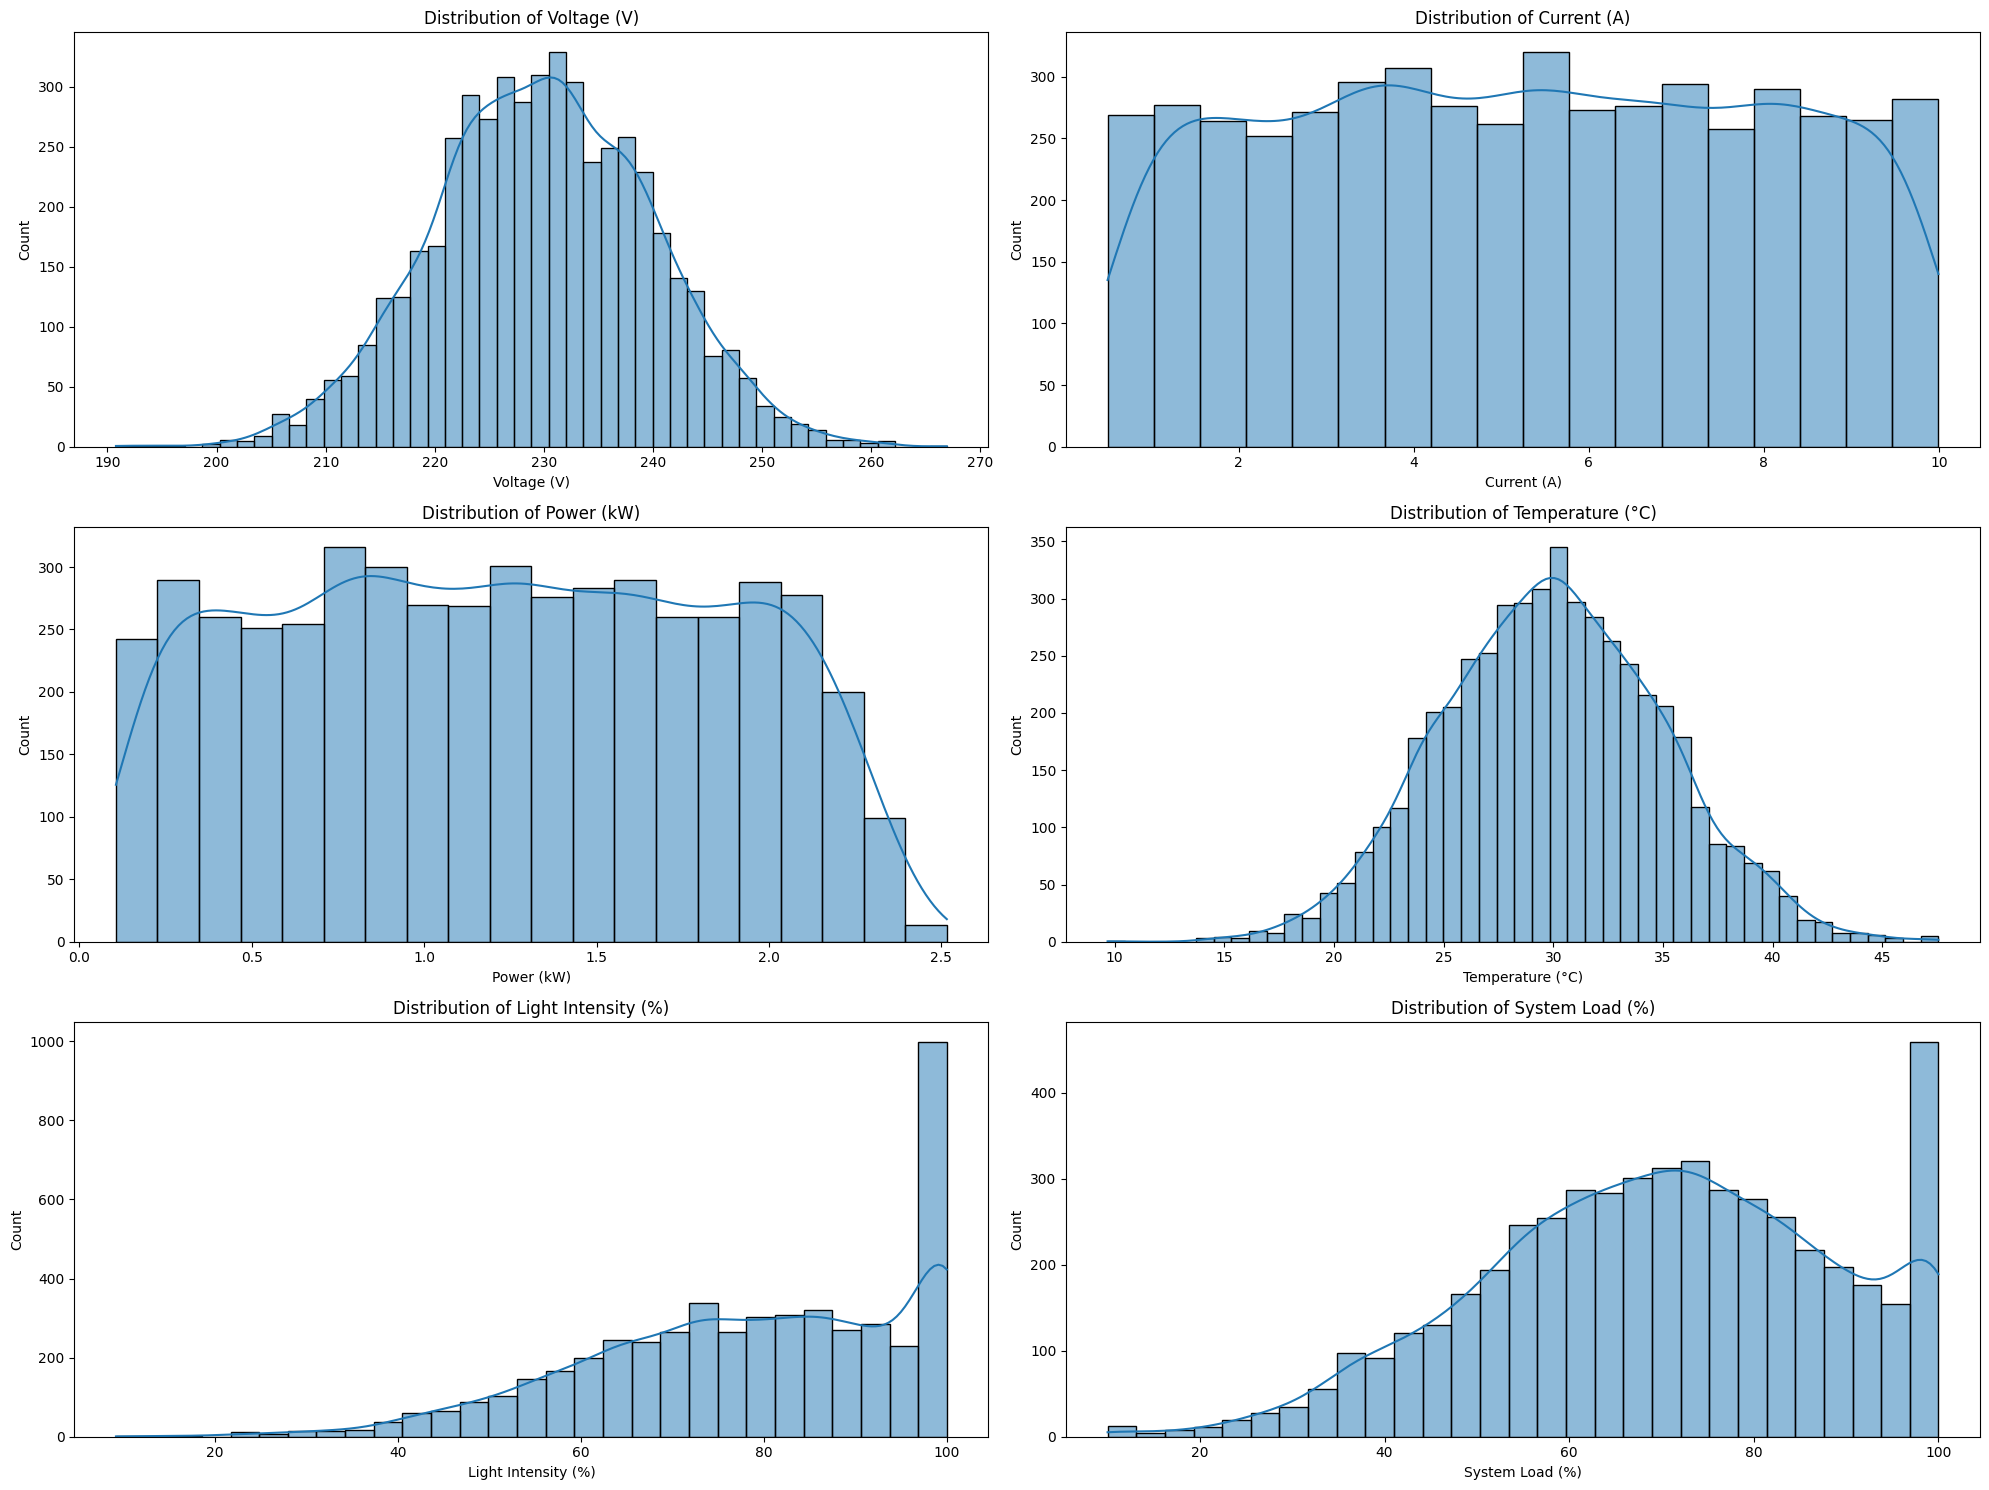

In [6]:
# 6. Visualize distributions of continuous variables
continuous_features = ['Voltage (V)', 'Current (A)', 'Power (kW)', 'Temperature (\u00b0C)', 'Light Intensity (%)', 'System Load (%)']

plt.figure(figsize=(20,15))
for idx, feature in enumerate(continuous_features):
    plt.subplot(3, 2, idx+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


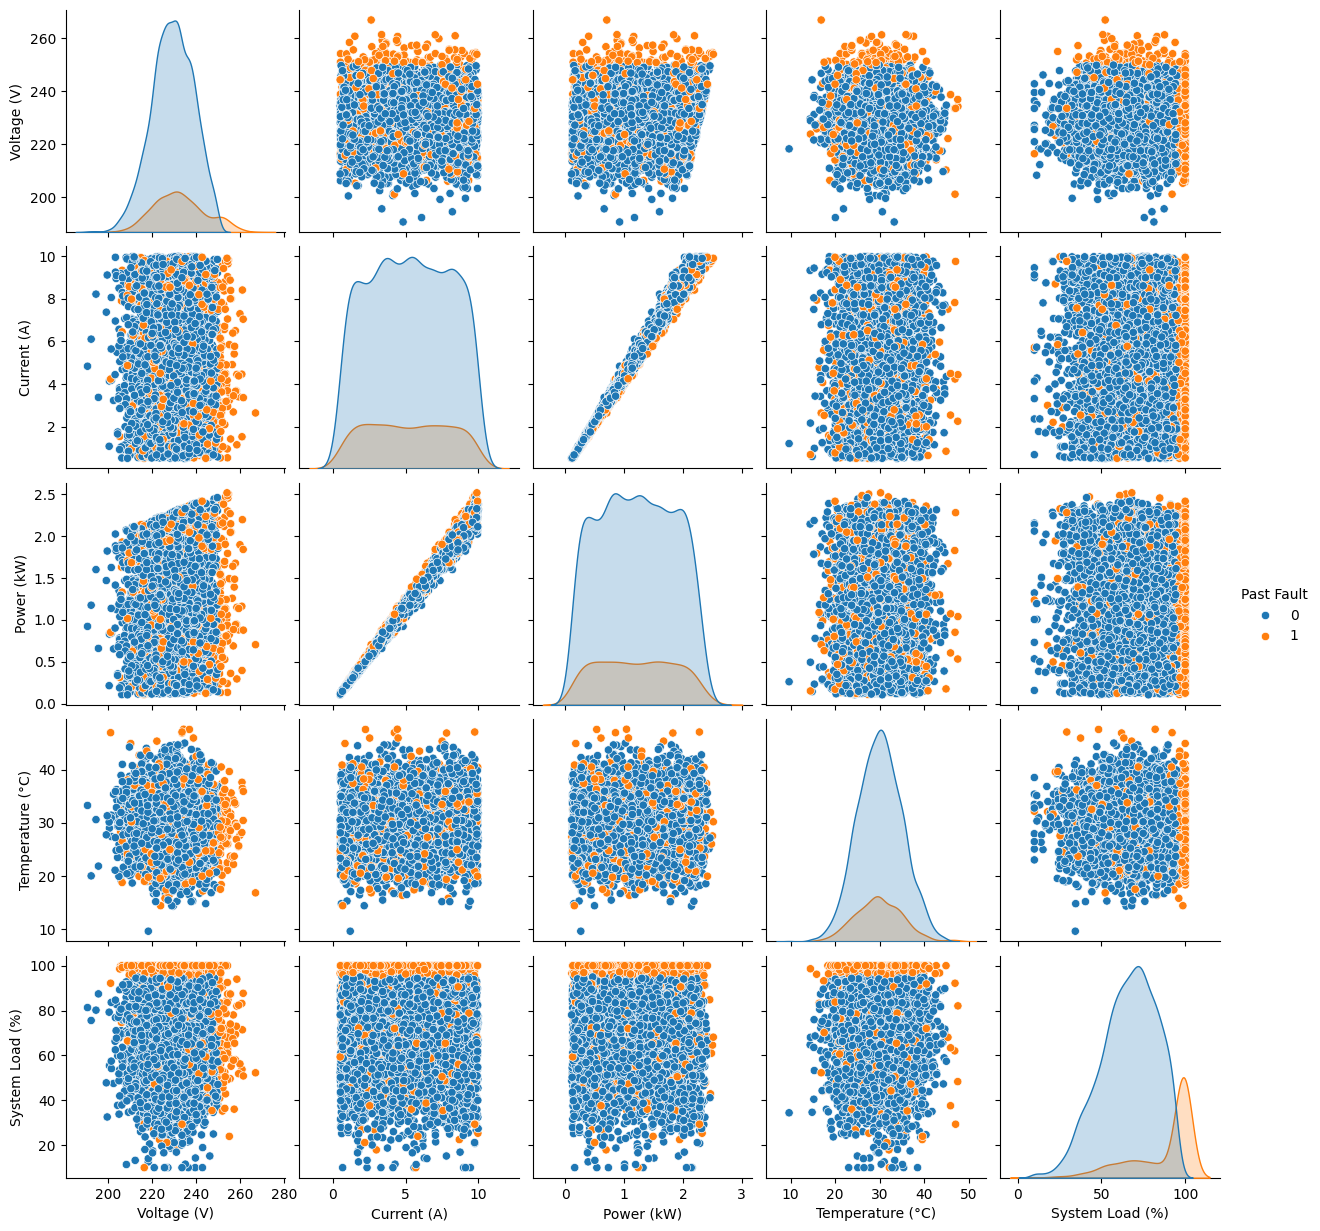

In [7]:
# 8. Pairplot for selected features
selected_features = ['Voltage (V)', 'Current (A)', 'Power (kW)', 'Temperature (\u00b0C)', 'System Load (%)', 'Past Fault']
sns.pairplot(df[selected_features], hue='Past Fault')
plt.show()

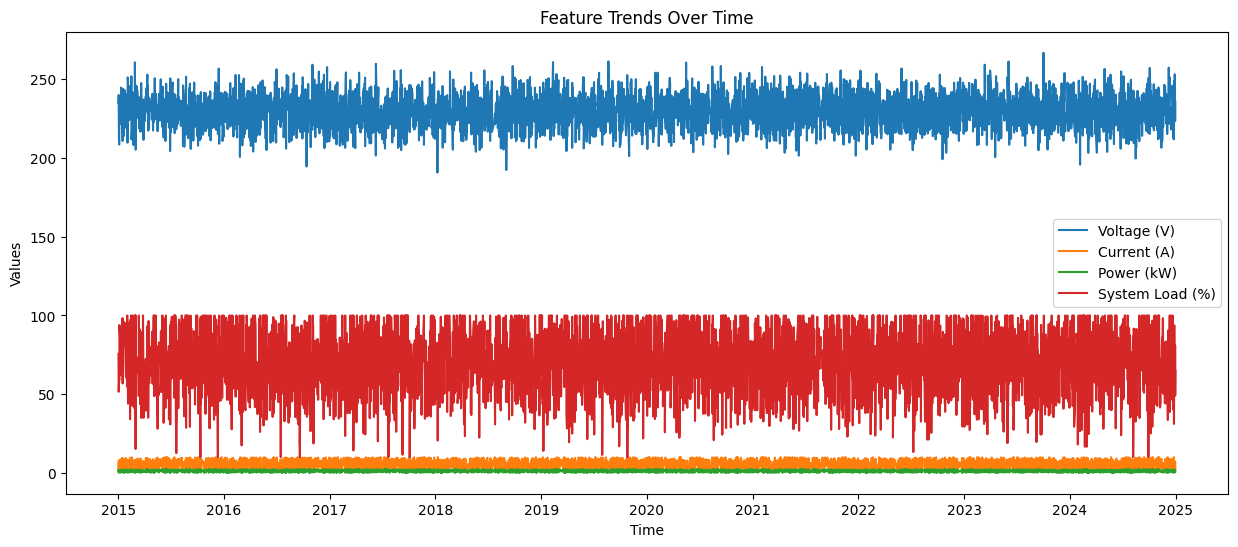

In [8]:
# 10. Time series trend analysis
plt.figure(figsize=(15,6))
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

for feature in ['Voltage (V)', 'Current (A)', 'Power (kW)', 'System Load (%)']:
    plt.plot(df.index, df[feature], label=feature)

plt.legend()
plt.title('Feature Trends Over Time')
plt.xlabel('Time')
plt.ylabel('Values')
plt.show()

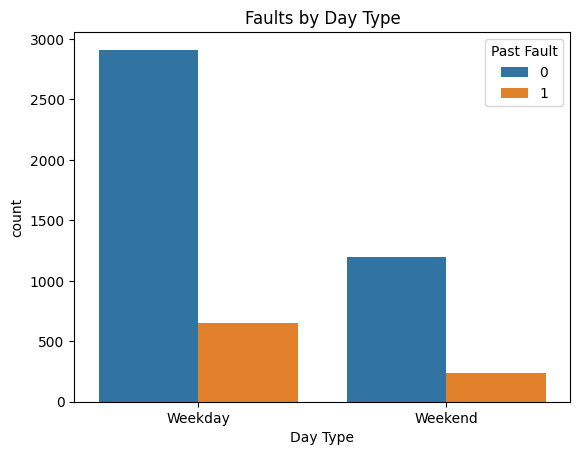

In [9]:
# 11. Fault counts by day type
sns.countplot(x='Day Type', hue='Past Fault', data=df)
plt.title('Faults by Day Type')
plt.show()

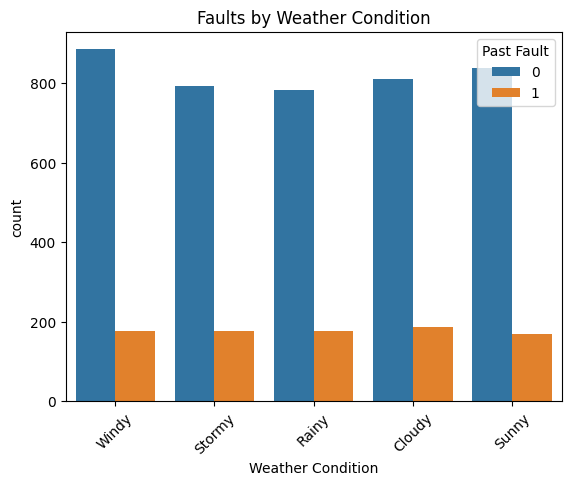

In [10]:
sns.countplot(x='Weather Condition', hue='Past Fault', data=df)
plt.xticks(rotation=45)
plt.title('Faults by Weather Condition')
plt.show()

In [11]:
# 13. Feature selection
features = [
    'Voltage (V)', 'Current (A)', 'Power (kW)', 'Power Factor',
    'Temperature (\u00b0C)', 'Light Intensity (%)', 'Time of Day',
    'Day Type Encoded', 'System Load (%)', 'Weather Encoded'
]
X = df[features]
y = df['Past Fault']


In [12]:
# 14. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# 15. Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
# 16. Predict on the test set
y_pred = clf.predict(X_test)

# 17. Evaluate the model
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       823
           1       0.99      0.70      0.82       177

    accuracy                           0.95      1000
   macro avg       0.97      0.85      0.89      1000
weighted avg       0.95      0.95      0.94      1000


Confusion Matrix:
 [[822   1]
 [ 53 124]]


In [16]:
# 19. Save the trained model
joblib.dump(clf, 'fault_detection_model.pkl')

print("Model training complete and saved!")

Model training complete and saved!


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def test_models(X_train, X_test, y_train, y_test):
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Random Forest": RandomForestClassifier(),
        "Gradient Boosting": GradientBoostingClassifier(),
        "Support Vector Machine": SVC(),
        "Decision Tree": DecisionTreeClassifier(),
        "K-Nearest Neighbors": KNeighborsClassifier()
    }

    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        acc = accuracy_score(y_test, preds)
        results[name] = acc
        print(f"{name}: {acc:.4f}")

    return results

# Example usage:
results = test_models(X_train, X_test, y_train, y_test)


Logistic Regression: 0.8860
Random Forest: 0.9460
Gradient Boosting: 0.9430
Support Vector Machine: 0.8230
Decision Tree: 0.9070
K-Nearest Neighbors: 0.9130


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def test_models_with_metrics(X_train, X_test, y_train, y_test):
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Random Forest": RandomForestClassifier(),
        "Gradient Boosting": GradientBoostingClassifier(),
        "Support Vector Machine": SVC(probability=True),
        "Decision Tree": DecisionTreeClassifier(),
        "K-Nearest Neighbors": KNeighborsClassifier()
    }

    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        probs = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

        acc = accuracy_score(y_test, preds)
        prec = precision_score(y_test, preds)
        rec = recall_score(y_test, preds)
        f1 = f1_score(y_test, preds)
        roc_auc = roc_auc_score(y_test, probs) if probs is not None else None

        results.append({
            "Model": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1-Score": f1,
            "ROC-AUC": roc_auc
        })

        print(f"\n{name}")
        print(f"Accuracy: {acc:.4f}")
        print(f"Precision: {prec:.4f}")
        print(f"Recall: {rec:.4f}")
        print(f"F1-Score: {f1:.4f}")
        if roc_auc is not None:
            print(f"ROC-AUC: {roc_auc:.4f}")

    return pd.DataFrame(results)

# Example usage:
results_df = test_models_with_metrics(X_train, X_test, y_train, y_test)
results_df



Logistic Regression
Accuracy: 0.8860
Precision: 0.8182
Recall: 0.4576
F1-Score: 0.5870
ROC-AUC: 0.7970

Random Forest
Accuracy: 0.9460
Precision: 0.9920
Recall: 0.7006
F1-Score: 0.8212
ROC-AUC: 0.8712

Gradient Boosting
Accuracy: 0.9430
Precision: 0.9688
Recall: 0.7006
F1-Score: 0.8131
ROC-AUC: 0.8511


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Support Vector Machine
Accuracy: 0.8230
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
ROC-AUC: 0.8163

Decision Tree
Accuracy: 0.9050
Precision: 0.7278
Recall: 0.7401
F1-Score: 0.7339
ROC-AUC: 0.8403

K-Nearest Neighbors
Accuracy: 0.9130
Precision: 0.8629
Recall: 0.6045
F1-Score: 0.7110
ROC-AUC: 0.8435


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.886,0.818182,0.457627,0.586957,0.796960
1,Random Forest,0.946,0.992000,0.700565,0.821192,0.871155
2,Gradient Boosting,0.943,0.968750,0.700565,0.813115,0.851113
3,Support Vector Machine,0.823,0.000000,0.000000,0.000000,0.816250
4,Decision Tree,0.905,0.727778,0.740113,0.733894,0.840287
5,K-Nearest Neighbors,0.913,0.862903,0.604520,0.710963,0.843531
